<a href="https://colab.research.google.com/github/Luigson/Minicurso-ciencia-de-dados/blob/main/Dia_4_Testes_e_Hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
#importar dados
df1 = pd.read_csv('turmas-2023.1.csv', sep=';', index_col=None)
df2 = pd.read_csv('turmas-2023.2.csv', sep=';', index_col=None)
df3 = pd.read_csv('turmas-2024-1.csv', sep=';', index_col=None)
df4 = pd.read_csv('turmas-2024-2.csv', sep=';', index_col=None)

# Concatenar tudo em um √∫nico DataFrame
df_total = pd.concat([df1, df2, df3, df4], ignore_index=True)
display(df_total)

id_turma codigo_turma      siape  matricula_docente_externo observacao  id_componente_curricular  ch_dedicada_periodo   nivel_ensino campus_turma                                        local   ano  periodo              data_inicio                 data_fim                          descricao_horario  total_solicitacoes  capacidade_aluno     tipo  distancia              data_consolidacao  agrupadora  id_turma_agrupadora  qtd_aulas_lancadas situacao_turma  convenio modalidade_participantes
0      57711864           01  1174208.0                        NaN        NaN                     69258                   15        T√âCNICO          NaN                                      Sala 03  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              4T4 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:59:04.285000000       False                  NaN                 0.0    CONSOLIDADA       NaN               Presencial
1      57711865           02  1174208.0                        NaN        NaN                     69258                   15        T√âCNICO          NaN                                      Sala 03  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              2T3 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:53:20.671000000       False                  NaN                13.0    CONSOLIDADA       NaN               Presencial
2      57711866           03  1174208.0                        NaN        NaN                     69258                   15        T√âCNICO          NaN                                       Sala E  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              6T4 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:57:36.425000000       False                  NaN                11.0    CONSOLIDADA       NaN               Presencial
3      57711867           01  1812476.0                        NaN        NaN                     69289                   15        T√âCNICO          NaN                                      Sala 13  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              3T1 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/10 09:14:34.285000000       False                  NaN                18.0    CONSOLIDADA       NaN               Presencial
4      57711868           02  1812476.0                        NaN        NaN                     69289                   15        T√âCNICO          NaN                                      Sala 13  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              3T2 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/10 09:13:43.535000000       False                  NaN                18.0    CONSOLIDADA       NaN               Presencial
...         ...          ...        ...                        ...        ...                       ...                  ...            ...          ...                                          ...   ...      ...                      ...                      ...                                        ...                 ...               ...      ...        ...                            ...         ...                  ...                 ...            ...       ...                      ...
60111  57759627           01  3063244.0                        NaN        NaN                     80141                   30  STRICTO SENSU          NaN                                ICe Sala 0.16  2024        2  2024/10/07 00:00:00.000  2024/10/18 00:00:00.000        23456N123 (07/10/2024 - 18/10/2024)                 0.0               5.0  REGULAR      False                            NaN       False                  NaN                 NaN       EXCLU√çDA       NaN               Presencial
60112  57760115  

In [2]:
# Vis√£o geral
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60116 entries, 0 to 60115
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_turma                   60116 non-null  int64  
 1   codigo_turma               60116 non-null  object 
 2   siape                      58785 non-null  float64
 3   matricula_docente_externo  1330 non-null   float64
 4   observacao                 1727 non-null   object 
 5   id_componente_curricular   60116 non-null  int64  
 6   ch_dedicada_periodo        60116 non-null  int64  
 7   nivel_ensino               60116 non-null  object 
 8   campus_turma               47449 non-null  object 
 9   local                      59773 non-null  object 
 10  ano                        60116 non-null  int64  
 11  periodo                    60116 non-null  int64  
 12  data_inicio                60116 non-null  object 
 13  data_fim                   60116 non-null  obj

In [3]:
#5 primeiras linhas
df_total.head()

id_turma codigo_turma      siape  matricula_docente_externo observacao  id_componente_curricular  ch_dedicada_periodo nivel_ensino campus_turma    local   ano  periodo              data_inicio                 data_fim              descricao_horario  total_solicitacoes  capacidade_aluno     tipo  distancia              data_consolidacao  agrupadora  id_turma_agrupadora  qtd_aulas_lancadas situacao_turma  convenio modalidade_participantes
0  57711864           01  1174208.0                        NaN        NaN                     69258                   15      T√âCNICO          NaN  Sala 03  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000  4T4 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:59:04.285000000       False                  NaN                 0.0    CONSOLIDADA       NaN               Presencial
1  57711865           02  1174208.0                        NaN        NaN                     69258                   15      T√âCNICO          NaN  Sala 03  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000  2T3 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:53:20.671000000       False                  NaN                13.0    CONSOLIDADA       NaN               Presencial
2  57711866           03  1174208.0                        NaN        NaN                     69258                   15      T√âCNICO          NaN   Sala E  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000  6T4 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:57:36.425000000       False                  NaN                11.0    CONSOLIDADA       NaN               Presencial
3  57711867           01  1812476.0                        NaN        NaN                     69289                   15      T√âCNICO          NaN  Sala 13  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000  3T1 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/10 09:14:34.285000000       False                  NaN                18.0    CONSOLIDADA       NaN               Presencial
4  57711868           02  1812476.0                        NaN        NaN                     69289                   15      T√âCNICO          NaN  Sala 13  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000  3T2 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/10 09:13:43.535000000       False                  NaN                18.0    CONSOLIDADA       NaN               Presencial

In [4]:
#Descri√ß√£o
df_total.describe(include='all')

id_turma codigo_turma         siape  matricula_docente_externo                                         observacao  id_componente_curricular  ch_dedicada_periodo nivel_ensino    campus_turma  local           ano       periodo              data_inicio                 data_fim descricao_horario  total_solicitacoes  capacidade_aluno     tipo distancia              data_consolidacao agrupadora  id_turma_agrupadora  qtd_aulas_lancadas situacao_turma  convenio modalidade_participantes
count   6.011600e+04        60116  5.878500e+04                1330.000000                                               1727              6.011600e+04         60116.000000        60116           47449  59773  60116.000000  60116.000000                    60116                    60116             58402        54283.000000      59890.000000    60116     60116                          56838      60116         2.376000e+03        56680.000000          60116       0.0                    60116
unique           NaN          213           NaN                        NaN                                                945                       NaN                  NaN            5               5   4796           NaN           NaN                      572                      656              8583                 NaN               NaN        3         2                          32926          1                  NaN                 NaN              4       NaN                        2
top              NaN           01           NaN                        NaN  Esta turma √© destinada aos alunos do curso de ...                       NaN                  NaN    GRADUA√á√ÉO  Campus Central   HUOL           NaN           NaN  2024/09/16 00:00:00.000  2024/07/06 00:00:00.000            3T1234                 NaN               NaN  REGULAR     False  2025/01/29 11:34:26.866000000      False                  NaN                 NaN    CONSOLIDADA       NaN               Presencial
freq             NaN        27752           NaN                        NaN                                                 40                       NaN                  NaN        48122           38703   4093           NaN           NaN                     9632                     9091               629                 NaN               NaN    59309     59081                             33      60116                  NaN                 NaN          56954       NaN                    59084
mean    5.773111e+07          NaN  2.221637e+06               50359.935338                                                NaN              1.705349e+05            29.507718          NaN             NaN    NaN   2023.497139      1.495226                      NaN                      NaN               NaN           17.822246         24.342712      NaN       NaN                            NaN        NaN         5.772954e+07           91.466937            NaN       NaN                      NaN
std     1.112257e+04          NaN  1.137572e+06               34927.064703                                                NaN              4.539591e+05            23.990604          NaN             NaN    NaN      0.499996      0.499981                      NaN                      NaN               NaN           22.652397         28.594672      NaN       NaN                            NaN        NaN         1.149284e+04           94.803789            NaN       NaN                      NaN
min     5.771186e+07          NaN  1.274600e+04                 310.000000                                                NaN              1.865100e+04             0.000000          NaN             NaN    NaN   2023.000000      1.000000                      NaN                      NaN               NaN            0.000000          1.000000      NaN       NaN                            NaN        NaN         5.771221e+07            0.000000            NaN       NaN                      NaN
25%     5.772183e+07          NaN  1.326629e+06  

In [5]:
df_total.isnull().sum()

id_turma                         0
codigo_turma                     0
siape                         1331
matricula_docente_externo    58786
observacao                   58389
id_componente_curricular         0
ch_dedicada_periodo              0
nivel_ensino                     0
campus_turma                 12667
local                          343
ano                              0
periodo                          0
data_inicio                      0
data_fim                         0
descricao_horario             1714
total_solicitacoes            5833
capacidade_aluno               226
tipo                             0
distancia                        0
data_consolidacao             3278
agrupadora                       0
id_turma_agrupadora          57740
qtd_aulas_lancadas            3436
situacao_turma                   0
convenio                     60116
modalidade_participantes         0
dtype: int64

In [6]:
#Quais s√£o colunas
df_total.columns

Index(['id_turma', 'codigo_turma', 'siape', 'matricula_docente_externo',
       'observacao', 'id_componente_curricular', 'ch_dedicada_periodo',
       'nivel_ensino', 'campus_turma', 'local', 'ano', 'periodo',
       'data_inicio', 'data_fim', 'descricao_horario', 'total_solicitacoes',
       'capacidade_aluno', 'tipo', 'distancia', 'data_consolidacao',
       'agrupadora', 'id_turma_agrupadora', 'qtd_aulas_lancadas',
       'situacao_turma', 'convenio', 'modalidade_participantes'],
      dtype='object')

In [7]:
#Apagar colunas n√£o aproveit√°veis

#Apagar coluna conv√™nio (totalmente vazia)
df_total = df_total.drop('convenio', axis=1)

display(df_total)

id_turma codigo_turma      siape  matricula_docente_externo observacao  id_componente_curricular  ch_dedicada_periodo   nivel_ensino campus_turma                                        local   ano  periodo              data_inicio                 data_fim                          descricao_horario  total_solicitacoes  capacidade_aluno     tipo  distancia              data_consolidacao  agrupadora  id_turma_agrupadora  qtd_aulas_lancadas situacao_turma modalidade_participantes
0      57711864           01  1174208.0                        NaN        NaN                     69258                   15        T√âCNICO          NaN                                      Sala 03  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              4T4 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:59:04.285000000       False                  NaN                 0.0    CONSOLIDADA               Presencial
1      57711865           02  1174208.0                        NaN        NaN                     69258                   15        T√âCNICO          NaN                                      Sala 03  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              2T3 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:53:20.671000000       False                  NaN                13.0    CONSOLIDADA               Presencial
2      57711866           03  1174208.0                        NaN        NaN                     69258                   15        T√âCNICO          NaN                                       Sala E  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              6T4 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:57:36.425000000       False                  NaN                11.0    CONSOLIDADA               Presencial
3      57711867           01  1812476.0                        NaN        NaN                     69289                   15        T√âCNICO          NaN                                      Sala 13  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              3T1 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/10 09:14:34.285000000       False                  NaN                18.0    CONSOLIDADA               Presencial
4      57711868           02  1812476.0                        NaN        NaN                     69289                   15        T√âCNICO          NaN                                      Sala 13  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              3T2 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/10 09:13:43.535000000       False                  NaN                18.0    CONSOLIDADA               Presencial
...         ...          ...        ...                        ...        ...                       ...                  ...            ...          ...                                          ...   ...      ...                      ...                      ...                                        ...                 ...               ...      ...        ...                            ...         ...                  ...                 ...            ...                      ...
60111  57759627           01  3063244.0                        NaN        NaN                     80141                   30  STRICTO SENSU          NaN                                ICe Sala 0.16  2024        2  2024/10/07 00:00:00.000  2024/10/18 00:00:00.000        23456N123 (07/10/2024 - 18/10/2024)                 0.0               5.0  REGULAR      False                            NaN       False                  NaN                 NaN       EXCLU√çDA               Presencial
60112  57760115           01  2370473.0                        NaN        NaN                    

In [8]:
#Apagar coluna id_turma_agrupadora (majoritariamente vazia)
df_total = df_total.drop('id_turma_agrupadora', axis=1)
display(df_total)

id_turma codigo_turma      siape  matricula_docente_externo observacao  id_componente_curricular  ch_dedicada_periodo   nivel_ensino campus_turma                                        local   ano  periodo              data_inicio                 data_fim                          descricao_horario  total_solicitacoes  capacidade_aluno     tipo  distancia              data_consolidacao  agrupadora  qtd_aulas_lancadas situacao_turma modalidade_participantes
0      57711864           01  1174208.0                        NaN        NaN                     69258                   15        T√âCNICO          NaN                                      Sala 03  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              4T4 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:59:04.285000000       False                 0.0    CONSOLIDADA               Presencial
1      57711865           02  1174208.0                        NaN        NaN                     69258                   15        T√âCNICO          NaN                                      Sala 03  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              2T3 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:53:20.671000000       False                13.0    CONSOLIDADA               Presencial
2      57711866           03  1174208.0                        NaN        NaN                     69258                   15        T√âCNICO          NaN                                       Sala E  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              6T4 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/21 10:57:36.425000000       False                11.0    CONSOLIDADA               Presencial
3      57711867           01  1812476.0                        NaN        NaN                     69289                   15        T√âCNICO          NaN                                      Sala 13  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              3T1 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/10 09:14:34.285000000       False                18.0    CONSOLIDADA               Presencial
4      57711868           02  1812476.0                        NaN        NaN                     69289                   15        T√âCNICO          NaN                                      Sala 13  2023        1  2023/02/27 00:00:00.000  2023/07/01 00:00:00.000              3T2 (27/02/2023 - 01/07/2023)                 NaN               1.0  REGULAR      False  2023/07/10 09:13:43.535000000       False                18.0    CONSOLIDADA               Presencial
...         ...          ...        ...                        ...        ...                       ...                  ...            ...          ...                                          ...   ...      ...                      ...                      ...                                        ...                 ...               ...      ...        ...                            ...         ...                 ...            ...                      ...
60111  57759627           01  3063244.0                        NaN        NaN                     80141                   30  STRICTO SENSU          NaN                                ICe Sala 0.16  2024        2  2024/10/07 00:00:00.000  2024/10/18 00:00:00.000        23456N123 (07/10/2024 - 18/10/2024)                 0.0               5.0  REGULAR      False                            NaN       False                 NaN       EXCLU√çDA               Presencial
60112  57760115           01  2370473.0                        NaN        NaN                     81488                   30        T√âCNICO          NaN                                  Veterin√°ria  2024        2  2024/09/16 00:00:00.000  2025/01/30 00:00:00.000 

In [9]:
# Create 'id_docente' column: use 'siape' if not null, otherwise use 'matricula_docente_externo'
df_total['id_docente'] = np.where(df_total['siape'].notnull(), df_total['siape'], df_total['matricula_docente_externo'])

# Create 'docente_interno' column: True if 'siape' was used for 'id_docente', False otherwise
df_total['docente_interno'] = df_total['siape'].notnull()
df_total = df_total.drop(columns=['siape', 'matricula_docente_externo'])

In [10]:
# Dado que as observa√ß√µes ocorrem em poucas turmas, a melhor pr√°tica √© separar uma tabela para obersav√ß√µes e remover a coluna observa√ß√£o do nosso dataset principal
obs_df = df_total[df_total["observacao"].notnull()][["id_turma","codigo_turma","id_docente","docente_interno", "observacao"]]
df_total = df_total.drop(columns=["observacao"])
print(obs_df.shape)
obs_df.to_csv("observacoes_turmas.csv", index=False)
display(obs_df.head())

(1727, 5)


id_turma codigo_turma  id_docente  docente_interno                                         observacao
262  57712152           01   1812476.0             True  6 Canto Pop, 1 bater, 1baixo el√©t., 1 guitar, ...
269  57712159           02   1812476.0             True  7 Canto Pop, 1 bater, 1baixo el√©t., 1 guitar, ...
312  57712201           04   2265109.0             True                       Dedicada ao estudo do Choro;
379  57712252           14   2275876.0             True  *Destinada a Ana Raquel A. P. S. Rosa - Matr√≠c...
380  57712253           15   4614196.0             True  *Destinada a v√≠nculo trancado: Bruna dos Santo...

In [11]:
display(df_total[df_total["id_docente"].isnull()])
print(df_total["id_docente"].max())

id_turma codigo_turma  id_componente_curricular  ch_dedicada_periodo   nivel_ensino campus_turma    local   ano  periodo              data_inicio                 data_fim descricao_horario  total_solicitacoes  capacidade_aluno     tipo  distancia              data_consolidacao  agrupadora  qtd_aulas_lancadas situacao_turma modalidade_participantes  id_docente  docente_interno
59813  57750420           01                     59275                   20  STRICTO SENSU          NaN  SALA 71  2024        2  2024/10/01 00:00:00.000  2024/10/31 00:00:00.000      4N234 5N1234                10.0              25.0  REGULAR      False  2025/01/09 15:39:18.989000000       False                 0.0    CONSOLIDADA               Presencial         NaN            False

9350807.0


In [12]:
# Aqui preenchemos o valor faltante
df_total["id_docente"] = df_total["id_docente"].fillna(9350808)

In [13]:
#Verificando dados que faltam
df_total.isna().sum()

id_turma                        0
codigo_turma                    0
id_componente_curricular        0
ch_dedicada_periodo             0
nivel_ensino                    0
campus_turma                12667
local                         343
ano                             0
periodo                         0
data_inicio                     0
data_fim                        0
descricao_horario            1714
total_solicitacoes           5833
capacidade_aluno              226
tipo                            0
distancia                       0
data_consolidacao            3278
agrupadora                      0
qtd_aulas_lancadas           3436
situacao_turma                  0
modalidade_participantes        0
id_docente                      0
docente_interno                 0
dtype: int64

In [14]:
#Preenchendo os que faltam
#Campus_turma
df_total['campus_turma'] = df_total['campus_turma'].fillna('N√£o informado')
#Local
df_total['local'] = df_total['local'].fillna('N√£o definido')
#descricao_horario
df_total['descricao_horario'] = df_total['descricao_horario'].fillna('N√£o informado')
#total_solicitacoes
df_total['total_solicitacoes'] = df_total['total_solicitacoes'].fillna(0)
df_total["total_solicitacoes"] = df_total["total_solicitacoes"].astype(int)
#capacidade_aluno
df_total['capacidade_aluno'] = df_total['capacidade_aluno'].fillna(0)
df_total["capacidade_aluno"] = df_total["capacidade_aluno"].astype(int)
#data_consolidacao
df_total['data_consolidacao'] = df_total['data_consolidacao'].fillna('N√£o Consolidada')
#qtd_aulas_lancadas
df_total["qtd_aulas_lancadas"] = df_total["qtd_aulas_lancadas"].fillna(0).astype(int)
#id_docente
df_total["id_docente"] = df_total["id_docente"].astype(int).astype(str)
df_total["id_turma"] = df_total["id_turma"].astype(int).astype(str)

In [15]:
#Verificando se ainda h√° dados faltantes
df_total.isna().sum()

id_turma                    0
codigo_turma                0
id_componente_curricular    0
ch_dedicada_periodo         0
nivel_ensino                0
campus_turma                0
local                       0
ano                         0
periodo                     0
data_inicio                 0
data_fim                    0
descricao_horario           0
total_solicitacoes          0
capacidade_aluno            0
tipo                        0
distancia                   0
data_consolidacao           0
agrupadora                  0
qtd_aulas_lancadas          0
situacao_turma              0
modalidade_participantes    0
id_docente                  0
docente_interno             0
dtype: int64

In [16]:
#Remover duplicatas
df_total.drop_duplicates(inplace=True)

In [17]:
#Convertendo tipo de dado com pd.to_numeric() ou pd.to_datetime() ou astype()
df_total['id_componente_curricular'] = df_total['id_componente_curricular'].astype(str)
df_total['data_inicio'] = pd.to_datetime(df_total['data_inicio'], errors='coerce')
df_total['data_fim'] = pd.to_datetime(df_total['data_fim'], errors='coerce')
df_total['data_consolidacao'] = pd.to_datetime(df_total['data_consolidacao'], errors='coerce')
df_total['qtd_aulas_lancadas'] = pd.to_numeric(df_total['qtd_aulas_lancadas'], errors='coerce').astype(int)
df_total['capacidade_aluno'] = pd.to_numeric(df_total['capacidade_aluno'], errors='coerce').astype(int)
df_total['total_solicitacoes'] = pd.to_numeric(df_total['total_solicitacoes'], errors='coerce').astype(int)

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59148 entries, 0 to 60115
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_turma                  59148 non-null  object        
 1   codigo_turma              59148 non-null  object        
 2   id_componente_curricular  59148 non-null  object        
 3   ch_dedicada_periodo       59148 non-null  int64         
 4   nivel_ensino              59148 non-null  object        
 5   campus_turma              59148 non-null  object        
 6   local                     59148 non-null  object        
 7   ano                       59148 non-null  int64         
 8   periodo                   59148 non-null  int64         
 9   data_inicio               59148 non-null  datetime64[ns]
 10  data_fim                  59148 non-null  datetime64[ns]
 11  descricao_horario         59148 non-null  object        
 12  total_solicitacoes     

In [18]:
display(df_total)

id_turma codigo_turma id_componente_curricular  ch_dedicada_periodo   nivel_ensino   campus_turma                                        local   ano  periodo data_inicio   data_fim                          descricao_horario  total_solicitacoes  capacidade_aluno     tipo  distancia       data_consolidacao  agrupadora  qtd_aulas_lancadas situacao_turma modalidade_participantes id_docente  docente_interno
0      57711864           01                    69258                   15        T√âCNICO  N√£o informado                                      Sala 03  2023        1  2023-02-27 2023-07-01              4T4 (27/02/2023 - 01/07/2023)                   0                 1  REGULAR      False 2023-07-21 10:59:04.285       False                   0    CONSOLIDADA               Presencial    1174208             True
1      57711865           02                    69258                   15        T√âCNICO  N√£o informado                                      Sala 03  2023        1  2023-02-27 2023-07-01              2T3 (27/02/2023 - 01/07/2023)                   0                 1  REGULAR      False 2023-07-21 10:53:20.671       False                  13    CONSOLIDADA               Presencial    1174208             True
2      57711866           03                    69258                   15        T√âCNICO  N√£o informado                                       Sala E  2023        1  2023-02-27 2023-07-01              6T4 (27/02/2023 - 01/07/2023)                   0                 1  REGULAR      False 2023-07-21 10:57:36.425       False                  11    CONSOLIDADA               Presencial    1174208             True
3      57711867           01                    69289                   15        T√âCNICO  N√£o informado                                      Sala 13  2023        1  2023-02-27 2023-07-01              3T1 (27/02/2023 - 01/07/2023)                   0                 1  REGULAR      False 2023-07-10 09:14:34.285       False                  18    CONSOLIDADA               Presencial    1812476             True
4      57711868           02                    69289                   15        T√âCNICO  N√£o informado                                      Sala 13  2023        1  2023-02-27 2023-07-01              3T2 (27/02/2023 - 01/07/2023)                   0                 1  REGULAR      False 2023-07-10 09:13:43.535       False                  18    CONSOLIDADA               Presencial    1812476             True
...         ...          ...                      ...                  ...            ...            ...                                          ...   ...      ...         ...        ...                                        ...                 ...               ...      ...        ...                     ...         ...                 ...            ...                      ...        ...              ...
60111  57759627           01                    80141                   30  STRICTO SENSU  N√£o informado                                ICe Sala 0.16  2024        2  2024-10-07 2024-10-18        23456N123 (07/10/2024 - 18/10/2024)                   0                 5  REGULAR      False                     NaT       False                   0       EXCLU√çDA               Presencial    3063244             True
60112  57760115           01                    81488                   30        T√âCNICO  N√£o informado                                  Veterin√°ria  2024        2  2024-09-16 2025-01-30             2M12 (16/09/2024 - 30/01/2025)                   0                30  REGULAR      False 2025-03-07 10:31:15.291       False                   0    CONSOLIDADA               Presencial    2370473             True
60113  57760258           01                    78793                   12     LATO SENSU  N√£o informado  Laborat√≥rio de Psicologia (ao lado do SEPA)  2024        2  2024-12-17 2024-12-18  34M2345  3T2345 (17/12/2024 - 18/12/2024)                   0                45  REG

In [19]:
#Notei que a coluna agrupadora s√≥ est√£o completas com false, ent√£o resolvi remov√™-las
df_total = df_total.drop('agrupadora', axis=1)
display(df_total)

id_turma codigo_turma id_componente_curricular  ch_dedicada_periodo   nivel_ensino   campus_turma                                        local   ano  periodo data_inicio   data_fim                          descricao_horario  total_solicitacoes  capacidade_aluno     tipo  distancia       data_consolidacao  qtd_aulas_lancadas situacao_turma modalidade_participantes id_docente  docente_interno
0      57711864           01                    69258                   15        T√âCNICO  N√£o informado                                      Sala 03  2023        1  2023-02-27 2023-07-01              4T4 (27/02/2023 - 01/07/2023)                   0                 1  REGULAR      False 2023-07-21 10:59:04.285                   0    CONSOLIDADA               Presencial    1174208             True
1      57711865           02                    69258                   15        T√âCNICO  N√£o informado                                      Sala 03  2023        1  2023-02-27 2023-07-01              2T3 (27/02/2023 - 01/07/2023)                   0                 1  REGULAR      False 2023-07-21 10:53:20.671                  13    CONSOLIDADA               Presencial    1174208             True
2      57711866           03                    69258                   15        T√âCNICO  N√£o informado                                       Sala E  2023        1  2023-02-27 2023-07-01              6T4 (27/02/2023 - 01/07/2023)                   0                 1  REGULAR      False 2023-07-21 10:57:36.425                  11    CONSOLIDADA               Presencial    1174208             True
3      57711867           01                    69289                   15        T√âCNICO  N√£o informado                                      Sala 13  2023        1  2023-02-27 2023-07-01              3T1 (27/02/2023 - 01/07/2023)                   0                 1  REGULAR      False 2023-07-10 09:14:34.285                  18    CONSOLIDADA               Presencial    1812476             True
4      57711868           02                    69289                   15        T√âCNICO  N√£o informado                                      Sala 13  2023        1  2023-02-27 2023-07-01              3T2 (27/02/2023 - 01/07/2023)                   0                 1  REGULAR      False 2023-07-10 09:13:43.535                  18    CONSOLIDADA               Presencial    1812476             True
...         ...          ...                      ...                  ...            ...            ...                                          ...   ...      ...         ...        ...                                        ...                 ...               ...      ...        ...                     ...                 ...            ...                      ...        ...              ...
60111  57759627           01                    80141                   30  STRICTO SENSU  N√£o informado                                ICe Sala 0.16  2024        2  2024-10-07 2024-10-18        23456N123 (07/10/2024 - 18/10/2024)                   0                 5  REGULAR      False                     NaT                   0       EXCLU√çDA               Presencial    3063244             True
60112  57760115           01                    81488                   30        T√âCNICO  N√£o informado                                  Veterin√°ria  2024        2  2024-09-16 2025-01-30             2M12 (16/09/2024 - 30/01/2025)                   0                30  REGULAR      False 2025-03-07 10:31:15.291                   0    CONSOLIDADA               Presencial    2370473             True
60113  57760258           01                    78793                   12     LATO SENSU  N√£o informado  Laborat√≥rio de Psicologia (ao lado do SEPA)  2024        2  2024-12-17 2024-12-18  34M2345  3T2345 (17/12/2024 - 18/12/2024)                   0                45  REGULAR      False                     NaT                   0         ABERTA               Presencial      836

In [20]:
# Padroniza√ß√£o de Texto
df_total['nivel_ensino'] = df_total['nivel_ensino'].str.lower().str.strip()
df_total['campus_turma'] = df_total['campus_turma'].str.lower().str.strip()
df_total['tipo'] = df_total['tipo'].str.lower().str.strip()
df_total['situacao_turma'] = df_total['situacao_turma'].str.lower().str.strip()


display(df_total)

id_turma codigo_turma id_componente_curricular  ch_dedicada_periodo   nivel_ensino   campus_turma                                        local   ano  periodo data_inicio   data_fim                          descricao_horario  total_solicitacoes  capacidade_aluno     tipo  distancia       data_consolidacao  qtd_aulas_lancadas situacao_turma modalidade_participantes id_docente  docente_interno
0      57711864           01                    69258                   15        t√©cnico  n√£o informado                                      Sala 03  2023        1  2023-02-27 2023-07-01              4T4 (27/02/2023 - 01/07/2023)                   0                 1  regular      False 2023-07-21 10:59:04.285                   0    consolidada               Presencial    1174208             True
1      57711865           02                    69258                   15        t√©cnico  n√£o informado                                      Sala 03  2023        1  2023-02-27 2023-07-01              2T3 (27/02/2023 - 01/07/2023)                   0                 1  regular      False 2023-07-21 10:53:20.671                  13    consolidada               Presencial    1174208             True
2      57711866           03                    69258                   15        t√©cnico  n√£o informado                                       Sala E  2023        1  2023-02-27 2023-07-01              6T4 (27/02/2023 - 01/07/2023)                   0                 1  regular      False 2023-07-21 10:57:36.425                  11    consolidada               Presencial    1174208             True
3      57711867           01                    69289                   15        t√©cnico  n√£o informado                                      Sala 13  2023        1  2023-02-27 2023-07-01              3T1 (27/02/2023 - 01/07/2023)                   0                 1  regular      False 2023-07-10 09:14:34.285                  18    consolidada               Presencial    1812476             True
4      57711868           02                    69289                   15        t√©cnico  n√£o informado                                      Sala 13  2023        1  2023-02-27 2023-07-01              3T2 (27/02/2023 - 01/07/2023)                   0                 1  regular      False 2023-07-10 09:13:43.535                  18    consolidada               Presencial    1812476             True
...         ...          ...                      ...                  ...            ...            ...                                          ...   ...      ...         ...        ...                                        ...                 ...               ...      ...        ...                     ...                 ...            ...                      ...        ...              ...
60111  57759627           01                    80141                   30  stricto sensu  n√£o informado                                ICe Sala 0.16  2024        2  2024-10-07 2024-10-18        23456N123 (07/10/2024 - 18/10/2024)                   0                 5  regular      False                     NaT                   0       exclu√≠da               Presencial    3063244             True
60112  57760115           01                    81488                   30        t√©cnico  n√£o informado                                  Veterin√°ria  2024        2  2024-09-16 2025-01-30             2M12 (16/09/2024 - 30/01/2025)                   0                30  regular      False 2025-03-07 10:31:15.291                   0    consolidada               Presencial    2370473             True
60113  57760258           01                    78793                   12     lato sensu  n√£o informado  Laborat√≥rio de Psicologia (ao lado do SEPA)  2024        2  2024-12-17 2024-12-18  34M2345  3T2345 (17/12/2024 - 18/12/2024)                   0                45  regular      False                     NaT                   0         aberta               Presencial      836

In [21]:
# Salvo como CSV (cria o arquivo)
df_total.to_csv('turmas_tratadas.csv', index=False, sep=';')

# Baixo o arquivo
from google.colab import files
files.download('turmas_tratadas.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
#Dia 2

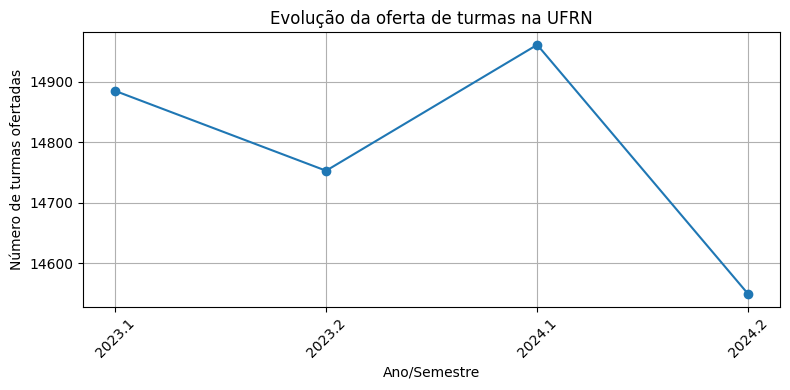

In [23]:
#Como a oferta de turmas da UFRN evoluiu ao longo dos anos?
oferta_por_semestre = df_total.groupby(['ano', 'periodo']).size().reset_index(name='qtd_turmas')

oferta_por_semestre['ano_periodo'] = oferta_por_semestre['ano'].astype(str) + '.' + oferta_por_semestre['periodo'].astype(str)

plt.figure(figsize=(8, 4))
plt.plot(oferta_por_semestre['ano_periodo'], oferta_por_semestre['qtd_turmas'], marker='o')
plt.xlabel('Ano/Semestre')
plt.ylabel('N√∫mero de turmas ofertadas')
plt.title('Evolu√ß√£o da oferta de turmas na UFRN')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

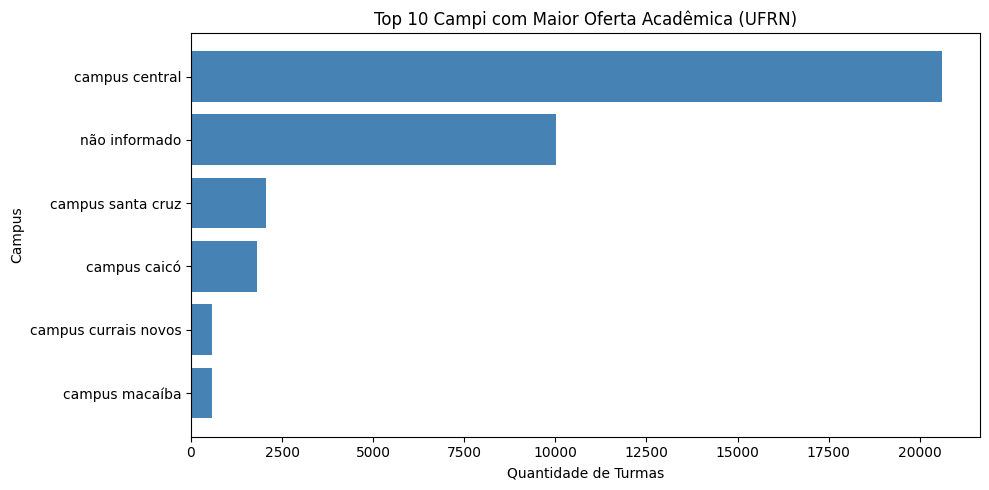

In [24]:
#Quais campi concentram a maior parte da oferta acad√™mica?
oferta_por_campus = (df_total.groupby('campus_turma')['id_turma'].nunique().reset_index(name='qtd_turmas').sort_values(by='qtd_turmas', ascending=False))
top10 = oferta_por_campus.head(10)

plt.figure(figsize=(10, 5))
plt.barh(top10['campus_turma'], top10['qtd_turmas'], color='steelblue')
plt.xlabel('Quantidade de Turmas')
plt.ylabel('Campus')
plt.title('Top 10 Campi com Maior Oferta Acad√™mica (UFRN)')
plt.gca().invert_yaxis()  # Coloca o maior no topo
plt.tight_layout()
plt.show()

In [25]:
#Existe diferen√ßa na capacidade m√©dia das turmas entre diferentes n√≠veis de ensino?
media_por_nivel = (df_total.groupby('nivel_ensino')['capacidade_aluno'].mean().reset_index(name='capacidade_media').sort_values(by='capacidade_media', ascending=False))
display(media_por_nivel)

nivel_ensino  capacidade_media
2             lato sensu         59.325450
1              gradua√ß√£o         25.439258
4                t√©cnico         24.344733
0  forma√ß√£o complementar         20.204969
3          stricto sensu         13.611355

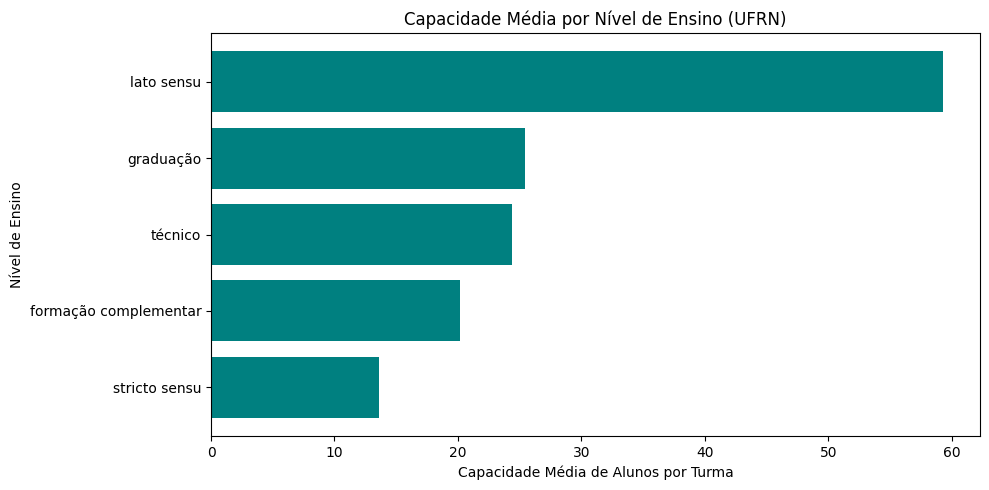

In [26]:
plt.figure(figsize=(10, 5))
plt.barh(media_por_nivel['nivel_ensino'], media_por_nivel['capacidade_media'], color='teal')
plt.xlabel('Capacidade M√©dia de Alunos por Turma')
plt.ylabel('N√≠vel de Ensino')
plt.title('Capacidade M√©dia por N√≠vel de Ensino (UFRN)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [27]:
#Como a modalidade √† dist√¢ncia se distribui entre os diferentes campi e n√≠veis?
df_ead = df_total[df_total['distancia'] == True]

In [28]:
ead_por_campus = (df_ead.groupby('campus_turma')['id_turma'].nunique().reset_index(name='turmas_ead').sort_values(by='turmas_ead', ascending=False))
display(ead_por_campus)

campus_turma  turmas_ead
0  n√£o informado         925

In [29]:
ead_por_nivel = (df_ead.groupby('nivel_ensino')['id_turma'].nunique().reset_index(name='turmas_ead').sort_values(by='turmas_ead', ascending=False))
display(ead_por_nivel)

nivel_ensino  turmas_ead
0      gradua√ß√£o         646
1     lato sensu         135
3        t√©cnico         117
2  stricto sensu          27

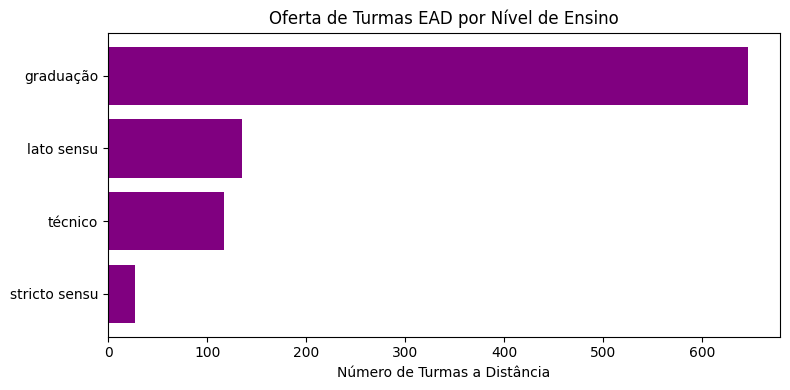

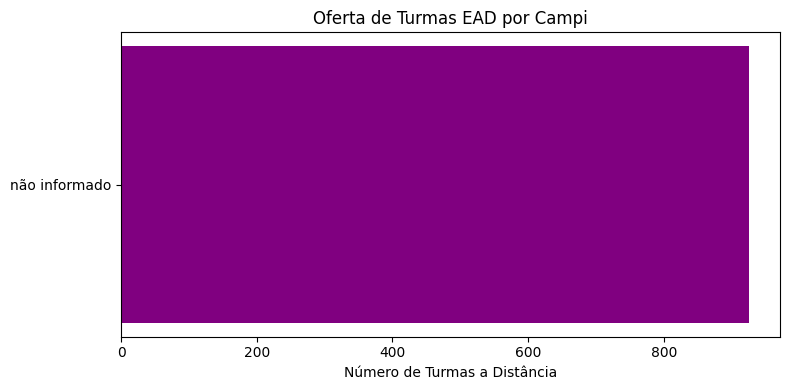

In [30]:
plt.figure(figsize=(8, 4))
plt.barh(ead_por_nivel['nivel_ensino'], ead_por_nivel['turmas_ead'], color='purple')
plt.xlabel('N√∫mero de Turmas a Dist√¢ncia')
plt.title('Oferta de Turmas EAD por N√≠vel de Ensino')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.barh(ead_por_campus['campus_turma'], ead_por_campus['turmas_ead'], color='purple')
plt.xlabel('N√∫mero de Turmas a Dist√¢ncia')
plt.title('Oferta de Turmas EAD por Campi')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

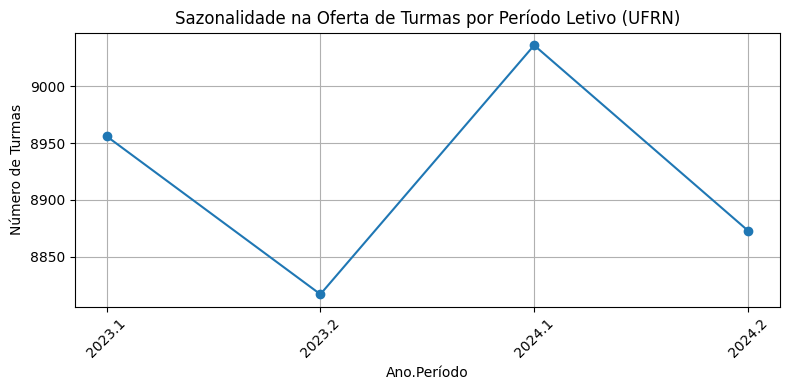

In [31]:
#H√° sazonalidade na oferta de turmas entre os per√≠odos letivos?
oferta_por_periodo = (df_total.groupby(['ano', 'periodo'])['id_turma'].nunique().reset_index(name='qtd_turmas').sort_values(['ano', 'periodo']))
oferta_por_periodo['ano_periodo'] = (oferta_por_periodo['ano'].astype(str) + '.' + oferta_por_periodo['periodo'].astype(str))
plt.figure(figsize=(8, 4))
plt.plot(oferta_por_periodo['ano_periodo'], oferta_por_periodo['qtd_turmas'], marker='o')
plt.title('Sazonalidade na Oferta de Turmas por Per√≠odo Letivo (UFRN)')
plt.xlabel('Ano.Per√≠odo')
plt.ylabel('N√∫mero de Turmas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

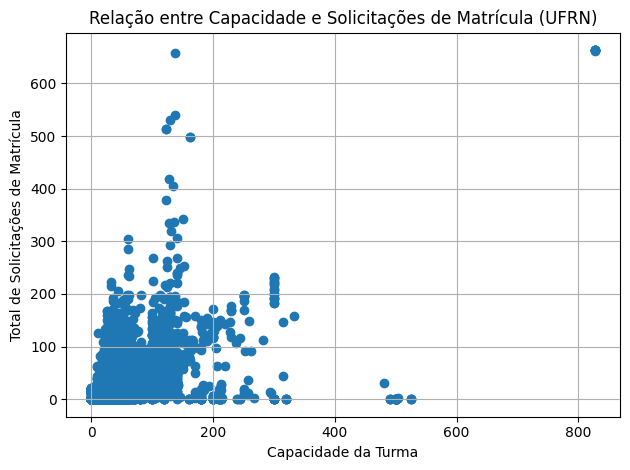

In [32]:
#Qual a rela√ß√£o entre a capacidade das turmas e o n√∫mero de solicita√ß√µes de matr√≠cula?
plt.scatter(df_total['capacidade_aluno'], df_total['total_solicitacoes'], marker='o')
plt.xlabel('Capacidade da Turma')
plt.ylabel('Total de Solicita√ß√µes de Matr√≠cula')
plt.title('Rela√ß√£o entre Capacidade e Solicita√ß√µes de Matr√≠cula (UFRN)')
plt.grid(True)
plt.tight_layout()
plt.show()

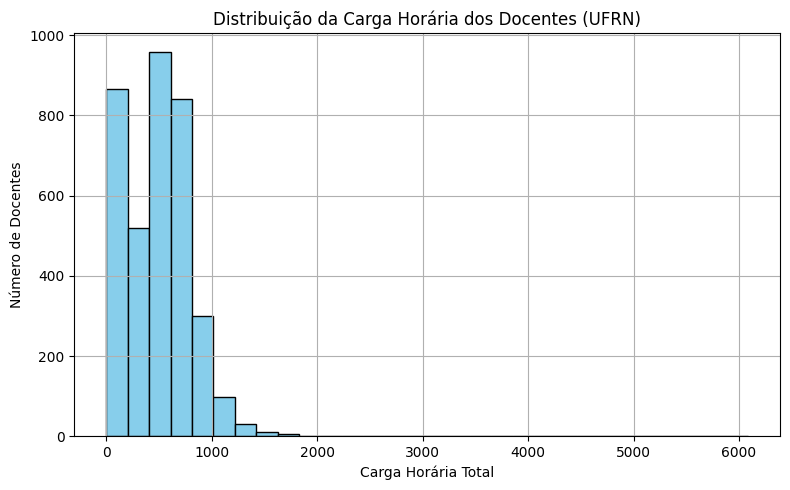

In [33]:
#Existem padr√µes na carga hor√°ria dedicada pelos docentes?
df_docentes = df_total.dropna(subset=['id_docente'])
carga_horaria_por_docente = (df_docentes.groupby('id_docente')['ch_dedicada_periodo'].sum().reset_index(name='carga_horaria_total').sort_values(by='carga_horaria_total', ascending=False))
plt.figure(figsize=(8, 5))
plt.hist(carga_horaria_por_docente['carga_horaria_total'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Carga Hor√°ria Total')
plt.ylabel('N√∫mero de Docentes')
plt.title('Distribui√ß√£o da Carga Hor√°ria dos Docentes (UFRN)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
#H√° diferen√ßas significativas entre turmas presenciais e √† dist√¢ncia em termos de capacidade e demanda?
turmas_presenciais = (df_total.groupby([df_total['distancia'] == 'false'])['capacidade_aluno'])

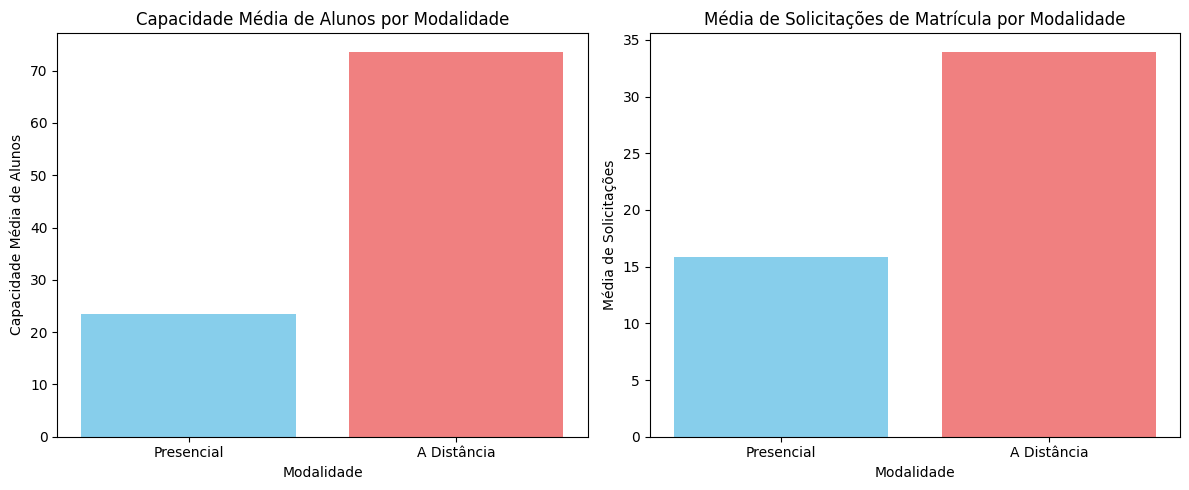

In [35]:
# Comparar capacidade e demanda entre turmas presenciais e a dist√¢ncia
comparacao_modalidades = df_total.groupby('distancia')[['capacidade_aluno', 'total_solicitacoes']].mean().reset_index()

# Renomear a coluna 'distancia' para melhor legibilidade
comparacao_modalidades['distancia'] = comparacao_modalidades['distancia'].map({True: 'A Dist√¢ncia', False: 'Presencial'})

# Criar gr√°ficos para visualiza√ß√£o usando plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gr√°fico para Capacidade M√©dia
axes[0].bar(comparacao_modalidades['distancia'], comparacao_modalidades['capacidade_aluno'], color=['skyblue', 'lightcoral'])
axes[0].set_title('Capacidade M√©dia de Alunos por Modalidade')
axes[0].set_xlabel('Modalidade')
axes[0].set_ylabel('Capacidade M√©dia de Alunos')
axes[0].tick_params(axis='x', rotation=0)

# Gr√°fico para Total de Solicita√ß√µes M√©dio
axes[1].bar(comparacao_modalidades['distancia'], comparacao_modalidades['total_solicitacoes'], color=['skyblue', 'lightcoral'])
axes[1].set_title('M√©dia de Solicita√ß√µes de Matr√≠cula por Modalidade')
axes[1].set_xlabel('Modalidade')
axes[1].set_ylabel('M√©dia de Solicita√ß√µes')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [36]:
#Dia 3

#Escolha de Vari√°veis
| Vari√°vel              | Tipo       | Justificativa                                                                |
| --------------------- | ---------- | ---------------------------------------------------------------------------- |
| `capacidade_aluno`    | Num√©rica   | Representa o tamanho m√°ximo da turma                                         |
| `ch_dedicada_periodo` | Num√©rica   | Mede a carga hor√°ria total da turma no per√≠odo                               |
| `total_solicitacoes`  | Num√©rica   | Indica a demanda ‚Äî fundamental para ver desequil√≠brios entre oferta/demanda. |
| `distancia`           | Booleana   | Permite distinguir turmas EAD e presenciais ‚Äî pode criar agrupamentos.       |
| `nivel_ensino`        | Categ√≥rica | Permite identificar diferen√ßas entre t√©cnico, gradua√ß√£o, p√≥s etc.            |

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
# Selecionar vari√°veis para clustering
variaveis = ['capacidade_aluno', 'ch_dedicada_periodo', 'total_solicitacoes', 'distancia', 'nivel_ensino']
df_cluster = df_total[variaveis].copy()


In [39]:
# Separa√ß√£o por tipo
numericas = ['capacidade_aluno', 'ch_dedicada_periodo', 'total_solicitacoes']
booleanas = ['distancia']
categoricas = ['nivel_ensino']

# Escalonamento
scaler = StandardScaler()
dados_numericos = scaler.fit_transform(df_cluster[numericas])

# Codifica√ß√£o One-Hot
encoder = OneHotEncoder(sparse_output=False)
dados_categoricos = encoder.fit_transform(df_cluster[categoricas])

# Concatenando todas as vari√°veis
X = np.concatenate([
    dados_numericos,
    df_cluster[booleanas].astype(int).values,
    dados_categoricos
], axis=1)


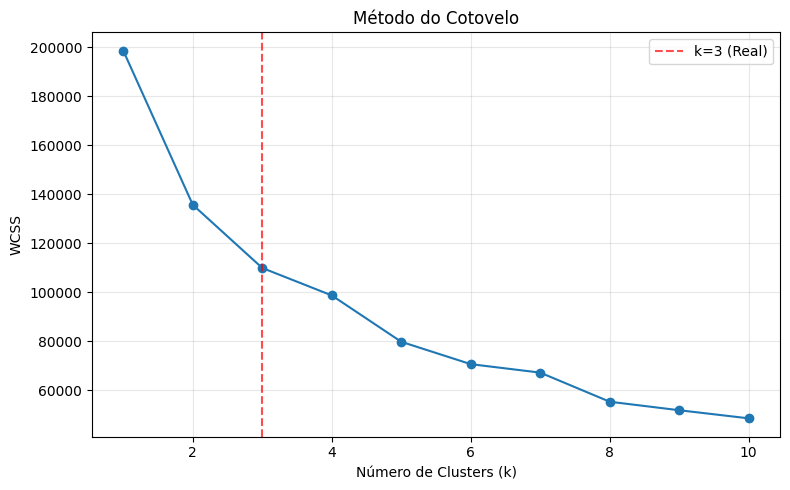

In [40]:
# Encontrar o n√∫mero ideal de clusters usando o M√©todo do Cotovelo
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot do cotovelo
plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('WCSS')
plt.title('M√©todo do Cotovelo')
plt.grid(True, alpha=0.3)

plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3 (Real)')
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
# Defina o valor de k com base no gr√°fico (exemplo: k = 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Adiciona os r√≥tulos de cluster ao DataFrame original
df_cluster['cluster'] = clusters


In [42]:
# Estat√≠sticas descritivas por cluster
df_analise = df_cluster.copy()
df_analise['cluster'] = df_analise['cluster'].astype(str)

agrupado = df_analise.groupby('cluster').agg({
    'capacidade_aluno': 'mean',
    'ch_dedicada_periodo': 'mean',
    'total_solicitacoes': 'mean',
    'distancia': 'mean'
})

display(agrupado)


capacidade_aluno  ch_dedicada_periodo  total_solicitacoes  distancia
cluster                                                                      
0               58.352972            38.716880           50.842860   0.041065
1               12.595388            14.249658            7.630659   0.008869
2               29.187388            59.881513           13.292333   0.022038

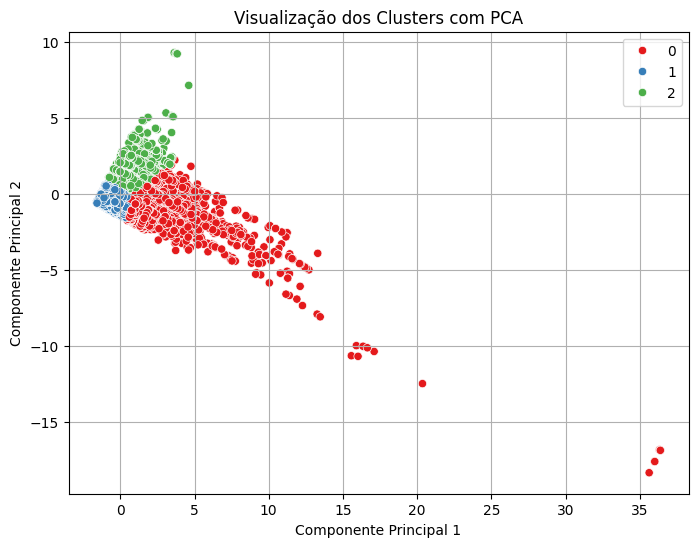

In [43]:
# Redu√ß√£o de dimensionalidade com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot dos clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1')
plt.title('Visualiza√ß√£o dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


In [44]:
agrupado = df_analise.groupby('cluster').agg({
    'capacidade_aluno': 'mean',
    'ch_dedicada_periodo': 'mean',
    'total_solicitacoes': 'mean',
    'distancia': 'mean'
})

display(agrupado)


capacidade_aluno  ch_dedicada_periodo  total_solicitacoes  distancia
cluster                                                                      
0               58.352972            38.716880           50.842860   0.041065
1               12.595388            14.249658            7.630659   0.008869
2               29.187388            59.881513           13.292333   0.022038

In [45]:
# Fun√ß√£o para gerar persona com base nas m√©dias
def gerar_persona(cluster_id, capacidade, carga_horaria, solicitacoes, distancia):
    descricao = f"üìå **Cluster {cluster_id}**\n"

    # Capacidade
    if capacidade > 50:
        descricao += "- Turmas grandes (capacidade m√©dia alta)\n"
    elif capacidade < 20:
        descricao += "- Turmas pequenas\n"
    else:
        descricao += "- Turmas de tamanho m√©dio\n"

    # Carga hor√°ria
    if carga_horaria > 50:
        descricao += "- Alta carga hor√°ria\n"
    elif carga_horaria < 20:
        descricao += "- Baixa carga hor√°ria\n"
    else:
        descricao += "- Carga hor√°ria intermedi√°ria\n"

    # Solicita√ß√µes
    if solicitacoes > 40:
        descricao += "- Muito procuradas (alta demanda)\n"
    elif solicitacoes < 15:
        descricao += "- Pouco procuradas (baixa demanda)\n"
    else:
        descricao += "- Demanda moderada\n"

    # Dist√¢ncia
    if distancia > 0.5:
        descricao += "- Predominantemente EAD\n"
    else:
        descricao += "- Predominantemente presenciais\n"

    return descricao

# Aplicar nos clusters
for cluster_id, row in agrupado.iterrows():
    persona = gerar_persona(cluster_id,
                            row['capacidade_aluno'],
                            row['ch_dedicada_periodo'],
                            row['total_solicitacoes'],
                            row['distancia'])
    print(persona + "\n" + "-"*40 + "\n")


üìå **Cluster 0**
- Turmas grandes (capacidade m√©dia alta)
- Carga hor√°ria intermedi√°ria
- Muito procuradas (alta demanda)
- Predominantemente presenciais

----------------------------------------

üìå **Cluster 1**
- Turmas pequenas
- Baixa carga hor√°ria
- Pouco procuradas (baixa demanda)
- Predominantemente presenciais

----------------------------------------

üìå **Cluster 2**
- Turmas de tamanho m√©dio
- Alta carga hor√°ria
- Pouco procuradas (baixa demanda)
- Predominantemente presenciais

----------------------------------------



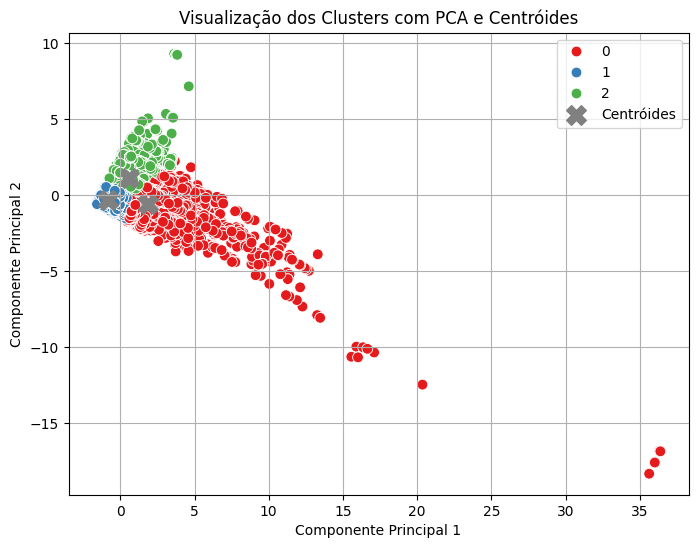

In [46]:
centroides = kmeans.cluster_centers_  # Matriz (k x n_features)
X_pca = pca.fit_transform(X)
centroides_pca = pca.transform(centroides)  # mesma transforma√ß√£o usada para X
# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', s=60)

# Plot centr√≥ides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            s=200, c='gray', marker='X', label='Centr√≥ides')

plt.title('Visualiza√ß√£o dos Clusters com PCA e Centr√≥ides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


##Dia 4

In [47]:
# Day_4_Testes_e_Hipoteses.ipynb ‚Äî c√©lula: testes
import pandas as pd
import numpy as np
from scipy import stats

# 1) leitura (ajuste o caminho se necess√°rio)


# 2) convers√µes num√©ricas (tolerante a erros)
for c in ['capacidade_aluno','ch_dedicada_periodo','total_solicitacoes','qtd_aulas_lancadas']:
    if c in df_total.columns:
        df_total[c] = pd.to_numeric(df_total[c], errors='coerce')

# 3) inspe√ß√£o r√°pida
print("Linhas:", len(df_total))
print("Colunas importantes presentes:", [c for c in ['capacidade_aluno','modalidade_participantes','nivel_ensino','total_solicitacoes','qtd_aulas_lancadas'] if c in df_total.columns])

# ---------- HIPOSE A: Presencial vs EaD (capacidade_aluno) ----------
# Filtrar grupos
mod = df_total['modalidade_participantes'].astype(str).str.lower()
pres_mask = mod.str.contains('pres', na=False)
ead_mask = mod.str.contains('ead|dist', na=False)

grupo_pres = df_total.loc[pres_mask, 'capacidade_aluno'].dropna()
grupo_ead = df_total.loc[ead_mask, 'capacidade_aluno'].dropna()

print(f"\nHip√≥tese A: N pres={len(grupo_pres)}, N ead={len(grupo_ead)}")
print("M√©dias:", grupo_pres.mean(), grupo_ead.mean())
# Estat√≠sticas descritivas
desc = pd.DataFrame({
    'pres': [grupo_pres.count(), grupo_pres.mean(), grupo_pres.std(), grupo_pres.median()],
    'ead' : [grupo_ead.count(), grupo_ead.mean(), grupo_ead.std(), grupo_ead.median()]
}, index=['n','mean','std','median'])
print(desc)

# Teste de normalidade em subamostras (opcional ‚Äî grandes amostras tornam Shapiro sens√≠vel)
def try_shapiro(series):
    if len(series) >= 3 and len(series) <= 5000:
        return stats.shapiro(series)
    elif len(series) > 5000:
        s = series.sample(500, random_state=42)
        return stats.shapiro(s)
    else:
        return None

sh_pres = try_shapiro(grupo_pres)
sh_ead = try_shapiro(grupo_ead)
print("Shapiro pres (stat,p):", sh_pres)
print("Shapiro ead (stat,p):", sh_ead)

# t-test de Welch (independente, n√£o assume vari√¢ncia igual)
t_stat, p_val = stats.ttest_ind(grupo_pres, grupo_ead, equal_var=False, nan_policy='omit')
print("t-statistic:", t_stat, "p-value:", p_val)

# Se desejar a alternativa n√£o-param√©trica:
try:
    u_stat, u_p = stats.mannwhitneyu(grupo_pres, grupo_ead, alternative='two-sided')
    print("Mann-Whitney U:", u_stat, "p-value:", u_p)
except Exception as e:
    print("Mann-Whitney erro:", e)

# ---------- HIPOSE B: Gradua√ß√£o vs P√≥s (total_solicitacoes) ----------
nivel = df_total['nivel_ensino'].astype(str).str.lower()
grad_mask = nivel.str.contains('grad', na=False)
pos_mask = nivel.str.contains('pos|p√≥s|pos-grad', na=False)

grupo_grad = df_total.loc[grad_mask, 'total_solicitacoes'].dropna()
grupo_pos = df_total.loc[pos_mask, 'total_solicitacoes'].dropna()

print(f"\nHip√≥tese B: N grad={len(grupo_grad)}, N pos={len(grupo_pos)}")
print("M√©dias:", grupo_grad.mean(), grupo_pos.mean())
print("Skewness:", grupo_grad.skew(), grupo_pos.skew())

# Mann-Whitney (mais robusto a n√£o normalidade)
if len(grupo_grad) > 0 and len(grupo_pos) > 0:
    u_stat, p_u = stats.mannwhitneyu(grupo_grad, grupo_pos, alternative='two-sided')
    print("Mann-Whitney U:", u_stat, "p-value:", p_u)
else:
    print("Amostras insuficientes para Mann-Whitney.")

# ---------- HIPOSE C: Correla√ß√£o qtd_aulas_lancadas x total_solicitacoes ----------
common = df_total[['qtd_aulas_lancadas','total_solicitacoes']].dropna()
print(f"\nHip√≥tese C: pares n={len(common)}")
if len(common) > 1:
    pearson_r, pearson_p = stats.pearsonr(common['qtd_aulas_lancadas'], common['total_solicitacoes'])
    spearman = stats.spearmanr(common['qtd_aulas_lancadas'], common['total_solicitacoes'])
    print("Pearson r:", pearson_r, "p:", pearson_p)
    # Spearman retorna NamedTuple em vers√µes recentes
    spearman_rho = spearman.correlation if hasattr(spearman,'correlation') else spearman[0]
    spearman_pv  = spearman.pvalue     if hasattr(spearman,'pvalue') else spearman[1]
    print("Spearman rho:", spearman_rho, "p:", spearman_pv)
else:
    print("Pares insuficientes para correla√ß√£o.")

# ---------- Salvar resultados resumidos ----------
res = {
    'hipotese_A': {'t_stat': float(t_stat) if 't_stat' in locals() else None, 'p_value': float(p_val) if 'p_val' in locals() else None},
    'hipotese_B': {'u_stat': float(u_stat) if 'u_stat' in locals() else None, 'p_value': float(p_u) if 'p_u' in locals() else None},
    'hipotese_C': {'pearson_r': float(pearson_r) if 'pearson_r' in locals() else None, 'pearson_p': float(pearson_p) if 'pearson_p' in locals() else None}
}
print(res)

Linhas: 59148
Colunas importantes presentes: ['capacidade_aluno', 'modalidade_participantes', 'nivel_ensino', 'total_solicitacoes', 'qtd_aulas_lancadas']

Hip√≥tese A: N pres=58116, N ead=1032
M√©dias: 23.443182600316607 73.65213178294573
                pres          ead
n       58116.000000  1032.000000
mean       23.443183    73.652132
std        24.573324   103.923394
median     17.000000    30.000000
Shapiro pres (stat,p): ShapiroResult(statistic=np.float64(0.41332095110466727), pvalue=np.float64(2.798154347319338e-37))
Shapiro ead (stat,p): ShapiroResult(statistic=np.float64(0.6889614864916809), pvalue=np.float64(7.368660607889887e-40))
t-statistic: -15.512870579114997 p-value: 6.014598527639204e-49
Mann-Whitney U: 24425652.0 p-value: 1.3125421510591476e-24

Hip√≥tese B: N grad=47282, N pos=0
M√©dias: 18.611585804323 nan
Skewness: 4.781143058496298 nan
Amostras insuficientes para Mann-Whitney.

Hip√≥tese C: pares n=59148
Pearson r: -0.10004519831745765 p: 2.0766637969375993e-131


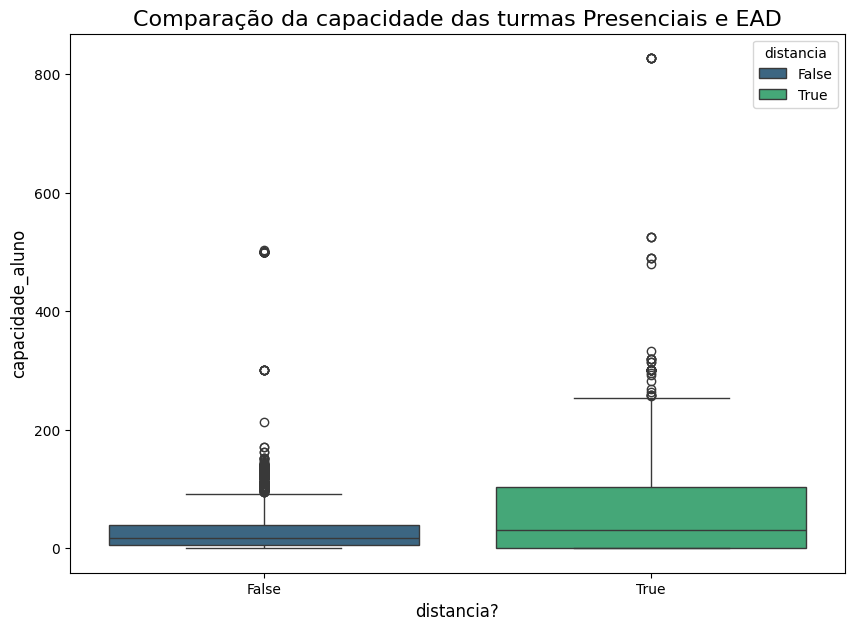

--- Teste t (Compara√ß√£o de M√©dias) ---
Estat√≠stica t: 57.1585
P-valor do Teste t: 0.0000
Resultado: Rejeitamos a hip√≥tese nula (H0). A diferen√ßa nas M√âDIAS de CRA √© estatisticamente significativa.

--- Teste de Mann-Whitney U (Compara√ß√£o de Distribui√ß√µes) ---
Estat√≠stica U: 35650140.5000
P-valor do Teste de Mann-Whitney (Bilateral): 0.0000
Resultado: Rejeitamos a hip√≥tese nula (H0). Existe uma diferen√ßa estatisticamente significativa entre as DISTRIBUI√á√ïES de CRA dos dois grupos.


In [48]:
# --- An√°lise Visual ---
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_total, x='distancia', y='capacidade_aluno', hue='distancia', palette='viridis')
plt.title('Compara√ß√£o da capacidade das turmas Presenciais e EAD', fontsize=16)
plt.xlabel('distancia?', fontsize=12)
plt.ylabel('capacidade_aluno', fontsize=12)
plt.show()

# Separar as amostras para os testes
bolsistas = df_total[df_total['distancia'] == True]['capacidade_aluno']
nao_bolsistas = df_total[df_total['distancia'] == False]['capacidade_aluno']
alpha = 0.05

#---------------------------------------------------
# Teste 1: Teste t para amostras independentes (Param√©trico)
#---------------------------------------------------
print("--- Teste t (Compara√ß√£o de M√©dias) ---")
# H0: As m√©dias de CRA s√£o iguais.
# Ha: As m√©dias de CRA s√£o diferentes.
t_stat, p_valor_t = stats.ttest_ind(bolsistas, nao_bolsistas)

print(f"Estat√≠stica t: {t_stat:.4f}")
print(f"P-valor do Teste t: {p_valor_t:.4f}")

if p_valor_t < alpha:
    print("Resultado: Rejeitamos a hip√≥tese nula (H0). A diferen√ßa nas M√âDIAS de CRA √© estatisticamente significativa.\n")
else:
    print("Resultado: Falhamos em rejeitar a hip√≥tese nula (H0). N√£o h√° evid√™ncia de diferen√ßa significativa nas M√âDIAS de CRA.\n")

#-----------------------------------------------------------
# Teste 2: Teste de Mann-Whitney U (N√£o-Param√©trico) - TESTE BILATERAL (TWO-SIDED)
#-----------------------------------------------------------
print("--- Teste de Mann-Whitney U (Compara√ß√£o de Distribui√ß√µes) ---")
# H0: As distribui√ß√µes de CRA s√£o iguais para os dois grupos.
# Ha: As distribui√ß√µes de CRA s√£o DIFERENTES entre os dois grupos.
u_stat, p_valor_mw = stats.mannwhitneyu(bolsistas, nao_bolsistas, alternative='two-sided') # 'two-sided' √© o padr√£o

print(f"Estat√≠stica U: {u_stat:.4f}")
print(f"P-valor do Teste de Mann-Whitney (Bilateral): {p_valor_mw:.4f}")

if p_valor_mw < alpha:
    print("Resultado: Rejeitamos a hip√≥tese nula (H0). Existe uma diferen√ßa estatisticamente significativa entre as DISTRIBUI√á√ïES de CRA dos dois grupos.")
else:
    print("Resultado: Falhamos em rejeitar a hip√≥tese nula (H0). N√£o h√° evid√™ncia de uma diferen√ßa significativa entre as DISTRIBUI√á√ïES de CRA dos dois grupos.")

In [49]:
df_total.columns

Index(['id_turma', 'codigo_turma', 'id_componente_curricular',
       'ch_dedicada_periodo', 'nivel_ensino', 'campus_turma', 'local', 'ano',
       'periodo', 'data_inicio', 'data_fim', 'descricao_horario',
       'total_solicitacoes', 'capacidade_aluno', 'tipo', 'distancia',
       'data_consolidacao', 'qtd_aulas_lancadas', 'situacao_turma',
       'modalidade_participantes', 'id_docente', 'docente_interno'],
      dtype='object')

##Dia 4
Vou usar o csv criado nos comandos anteriores nessa parte


In [50]:
import pandas as pd

# Leitura do arquivo CSV tratado
df = pd.read_csv("turmas_tratadas.csv", delimiter=";")

# Exibir informa√ß√µes iniciais
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59148 entries, 0 to 59147
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_turma                  59148 non-null  int64 
 1   codigo_turma              59148 non-null  object
 2   id_componente_curricular  59148 non-null  int64 
 3   ch_dedicada_periodo       59148 non-null  int64 
 4   nivel_ensino              59148 non-null  object
 5   campus_turma              59148 non-null  object
 6   local                     59148 non-null  object
 7   ano                       59148 non-null  int64 
 8   periodo                   59148 non-null  int64 
 9   data_inicio               59148 non-null  object
 10  data_fim                  59148 non-null  object
 11  descricao_horario         59148 non-null  object
 12  total_solicitacoes        59148 non-null  int64 
 13  capacidade_aluno          59148 non-null  int64 
 14  tipo                  

id_turma codigo_turma  id_componente_curricular  ch_dedicada_periodo nivel_ensino   campus_turma    local   ano  periodo data_inicio    data_fim              descricao_horario  total_solicitacoes  capacidade_aluno     tipo  distancia        data_consolidacao  qtd_aulas_lancadas situacao_turma modalidade_participantes  id_docente  docente_interno
0  57711864           01                     69258                   15      t√©cnico  n√£o informado  Sala 03  2023        1  2023-02-27  2023-07-01  4T4 (27/02/2023 - 01/07/2023)                   0                 1  regular      False  2023-07-21 10:59:04.285                   0    consolidada               Presencial     1174208             True
1  57711865           02                     69258                   15      t√©cnico  n√£o informado  Sala 03  2023        1  2023-02-27  2023-07-01  2T3 (27/02/2023 - 01/07/2023)                   0                 1  regular      False  2023-07-21 10:53:20.671                  13    consolidada               Presencial     1174208             True
2  57711866           03                     69258                   15      t√©cnico  n√£o informado   Sala E  2023        1  2023-02-27  2023-07-01  6T4 (27/02/2023 - 01/07/2023)                   0                 1  regular      False  2023-07-21 10:57:36.425                  11    consolidada               Presencial     1174208             True
3  57711867           01                     69289                   15      t√©cnico  n√£o informado  Sala 13  2023        1  2023-02-27  2023-07-01  3T1 (27/02/2023 - 01/07/2023)                   0                 1  regular      False  2023-07-10 09:14:34.285                  18    consolidada               Presencial     1812476             True
4  57711868           02                     69289                   15      t√©cnico  n√£o informado  Sala 13  2023        1  2023-02-27  2023-07-01  3T2 (27/02/2023 - 01/07/2023)                   0                 1  regular      False  2023-07-10 09:13:43.535                  18    consolidada               Presencial     1812476             True

## Formula√ß√£o das Hip√≥teses

**Hip√≥tese 1 (H1):** A m√©dia da capacidade de alunos por turma mudou significativamente ao longo dos anos.

- H0: A m√©dia √© igual em todos os anos.
- H1: Existe diferen√ßa significativa em pelo menos um ano.

**Hip√≥tese 2 (H2):** H√° diferen√ßa significativa no total de solicita√ß√µes entre per√≠odos (matutino, vespertino, noturno).

- H0: A m√©dia de solicita√ß√µes √© igual entre os per√≠odos.
- H1: Pelo menos um per√≠odo tem m√©dia diferente.

**Hip√≥tese 3 (H3):** A rela√ß√£o entre capacidade de alunos e total de solicita√ß√µes √© positiva.

- H0: N√£o h√° correla√ß√£o.
- H1: Existe correla√ß√£o positiva significativa.


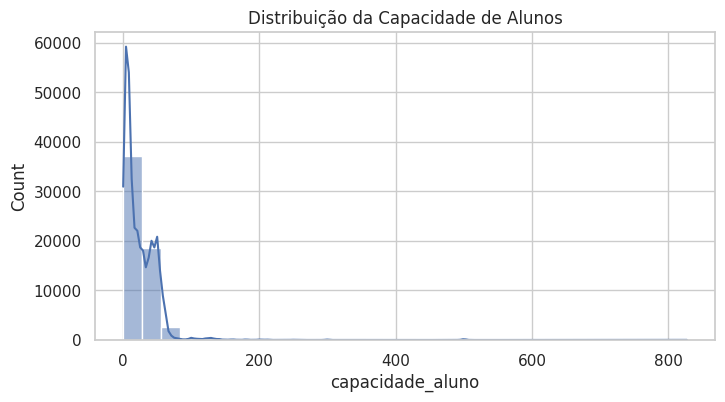

In [51]:
# Ajustar estilo dos gr√°ficos
sns.set(style="whitegrid")

# Histograma de capacidade de alunos
plt.figure(figsize=(8,4))
sns.histplot(df['capacidade_aluno'], bins=30, kde=True)
plt.title("Distribui√ß√£o da Capacidade de Alunos")
plt.show()

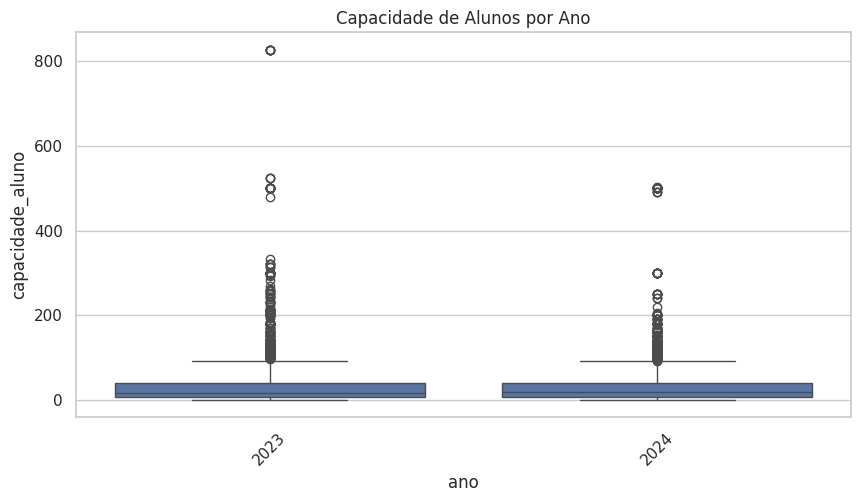

In [52]:
# Boxplot por ano
plt.figure(figsize=(10,5))
sns.boxplot(x='ano', y='capacidade_aluno', data=df)
plt.title("Capacidade de Alunos por Ano")
plt.xticks(rotation=45)
plt.show()

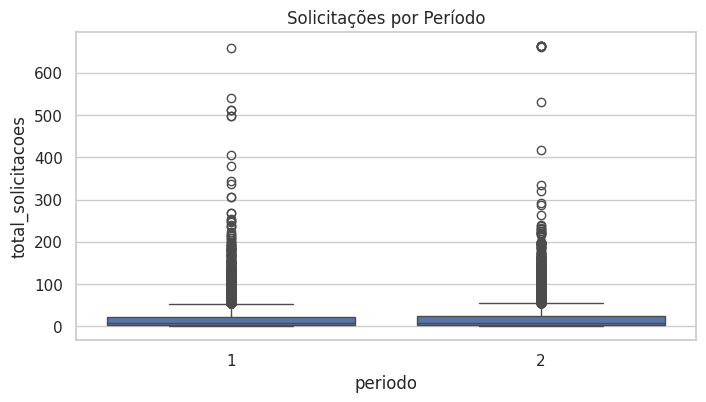

In [53]:
# Boxplot de solicita√ß√µes por per√≠odo
plt.figure(figsize=(8,4))
sns.boxplot(x='periodo', y='total_solicitacoes', data=df)
plt.title("Solicita√ß√µes por Per√≠odo")
plt.show()

In [54]:
from scipy import stats

# --- Teste 1: ANOVA para capacidade_aluno por ano ---
anos = [grupo["capacidade_aluno"].dropna() for nome, grupo in df.groupby("ano")]
anova_capacidade = stats.f_oneway(*anos)
print("ANOVA capacidade por ano:", anova_capacidade)

# --- Teste 2: ANOVA para total_solicitacoes por periodo ---
periodos = [grupo["total_solicitacoes"].dropna() for nome, grupo in df.groupby("periodo")]
anova_solicitacoes = stats.f_oneway(*periodos)
print("ANOVA solicita√ß√µes por per√≠odo:", anova_solicitacoes)

# --- Teste 3: Correla√ß√£o capacidade x solicita√ß√µes ---
corr, pval = stats.pearsonr(df["capacidade_aluno"].dropna(), df["total_solicitacoes"].dropna())
print(f"Correla√ß√£o: {corr:.3f}, p-valor: {pval:.5f}")


ANOVA capacidade por ano: F_onewayResult(statistic=np.float64(0.5424277827110017), pvalue=np.float64(0.46143123363609784))
ANOVA solicita√ß√µes por per√≠odo: F_onewayResult(statistic=np.float64(5.160186265312038), pvalue=np.float64(0.023113994470428143))
Correla√ß√£o: 0.566, p-valor: 0.00000


## Interpreta√ß√£o dos Resultados

- **Teste 1 (Capacidade x Ano)**: Se p-valor < 0.05, rejeita-se H0 e conclui-se que h√° diferen√ßa significativa na capacidade m√©dia entre anos.
- **Teste 2 (Solicita√ß√µes x Per√≠odo)**: Se p-valor < 0.05, rejeita-se H0 e conclui-se que h√° diferen√ßa significativa entre per√≠odos.
- **Teste 3 (Correla√ß√£o)**: Se p-valor < 0.05 e a correla√ß√£o for positiva, h√° evid√™ncia de rela√ß√£o direta entre capacidade e solicita√ß√µes.


## Conclus√£o Final

1) ANOVA capacidade por ano

Estat√≠stica F ‚âà 0,54, p-valor ‚âà 0,46 ‚Üí N√£o h√° diferen√ßa estatisticamente significativa na capacidade m√©dia das turmas entre os anos analisados (n√≠vel de signific√¢ncia de 5%).

Em termos pr√°ticos: a capacidade m√©dia n√£o varia de forma relevante ao longo dos anos.

2) ANOVA solicita√ß√µes por per√≠odo

Estat√≠stica F ‚âà 5,16, p-valor ‚âà 0,023 ‚Üí Diferen√ßa estatisticamente significativa nas solicita√ß√µes m√©dias entre per√≠odos.

Isso sugere que a demanda por turmas varia conforme o per√≠odo (por exemplo, semestre ou trimestre).

3) Correla√ß√£o (Pearson)

r ‚âà 0,566, p-valor ‚âà 0,000 ‚Üí Correla√ß√£o moderada e positiva entre as vari√°veis analisadas.

Interpreta√ß√£o: quando uma vari√°vel aumenta, a outra tende a aumentar tamb√©m, e essa rela√ß√£o √© estatisticamente significativa..
